In [129]:
# modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
# import collected data
df = pd.read_csv("./college_df.csv").iloc[:,1:] # ignore unecessary first column create from ".to_csv" in Data Collection
df.head()

,School Name,School ID,State,School Ownership,Full-time Faculty Rate (%),Faculty Average Monthly Salary,Student Enrollment Size,Student Enrollment All,Male Students (%),Female Students (%),...,Mean Male Earnings (10 Yrs after Entry),Mean Female Earnings (10 Yrs after Entry),Std. Deviation Earning (10 Yrs after Entry),Percent of Students Earning >$25K (10 Yrs after Entry),Low Income Students (10 Yrs after Entry),Medium Income Students (10 Yrs after Entry),High Income Students (10 Yrs after Entry),Mean Earnings Low (10 Yrs after Entry),Mean Earnings Medium (10 Yrs after Entry),Mean Earnings High (10 Yrs after Entry)
0,Alabama A & M University,100654,AL,Public,99.60,7599.0,5090.0,NaN,39.78,60.22,...,38500.0,32600.0,25400.0,0.599,459.0,337.0,166.0,33000.0,37300.0,39500.0
1,University of Alabama at Birmingham,100663,AL,Public,76.19,11380.0,13549.0,NaN,38.16,61.84,...,57400.0,43200.0,39200.0,0.747,1304.0,911.0,649.0,47000.0,49500.0,49300.0
2,University of Alabama in Huntsville,100706,AL,Public,67.02,9697.0,7825.0,NaN,58.91,41.09,...,58700.0,46000.0,33600.0,0.779,682.0,454.0,378.0,47000.0,55500.0,55100.0
3,Alabama State University,100724,AL,Public,67.97,7194.0,3603.0,NaN,36.05,63.95,...,33000.0,28300.0,21400.0,0.528,1519.0,548.0,151.0,29000.0,32500.0,34300.0
4,The University of Alabama,100751,AL,Public,77.07,10349.0,30610.0,NaN,44.17,55.83,...,59100.0,45100.0,42500.0,0.786,1424.0,1545.0,2024.0,45500.0,51600.0,55800.0


In [131]:
df = df.dropna(how = 'all',axis = 1) # drop columns with all nas

In [132]:
# look at columns, which am I really interested in?
print(list(df.columns))

['School Name', 'School ID', 'State', 'School Ownership', 'Full-time Faculty Rate (%)', 'Faculty Average Monthly Salary', 'Student Enrollment Size', 'Male Students (%)', 'Female Students (%)', 'Retention Rate 4 Yr (%)', 'Attendance Cost (Academic Year)', '150% Completion Rate at 4 Yr (%)', 'Admission Rate (%)', 'SAT Average Overall', 'SAT 75th Percentile Math', 'SAT 75th Percentile Reading', 'SAT 75th Percentile Writing', 'Mean Earnings (6 Yrs after Entry)', 'Mean Male Earnings (6 Yrs after Entry)', 'Mean Female Earnings (6 Yrs after Entry)', 'Std. Deviation Earning (6 Yrs after Entry)', 'Percent of Students Earning >$25K (6 Yrs after Entry)', 'Low Income Students (6 Yrs after Entry)', 'Medium Income Students (6 Yrs after Entry)', 'High Income Students (6 Yrs after Entry)', 'Mean Earnings Low (6 Yrs after Entry)', 'Mean Earnings Medium (6 Yrs after Entry)', 'Mean Earnings High (6 Yrs after Entry)', 'Mean Earnings (10 Yrs after Entry)', 'Mean Male Earnings (10 Yrs after Entry)', 'Mean F

In [133]:
# new column -> female students > 50%
df = df.assign(Female_Majority = df["Female Students (%)"] > 50.00)

In [134]:
# filter down the columns
columns_to_keep = [0,2,3,4,5,6,8,9,10,12,13,17,19,28,-1]
df = df.iloc[:,columns_to_keep]
df.head(10)

,School Name,State,School Ownership,Full-time Faculty Rate (%),Faculty Average Monthly Salary,Student Enrollment Size,Female Students (%),Retention Rate 4 Yr (%),Attendance Cost (Academic Year),Admission Rate (%),SAT Average Overall,Mean Earnings (6 Yrs after Entry),Mean Female Earnings (6 Yrs after Entry),Mean Earnings (10 Yrs after Entry),Female_Majority
0,Alabama A & M University,AL,Public,99.60,7599.0,5090.0,60.22,54.03,23445.0,89.65,959.0,28400.0,26700.0,35500.0,True
1,University of Alabama at Birmingham,AL,Public,76.19,11380.0,13549.0,61.84,86.40,25542.0,80.60,1245.0,39400.0,36600.0,48400.0,True
2,University of Alabama in Huntsville,AL,Public,67.02,9697.0,7825.0,41.09,81.80,24861.0,77.11,1300.0,40300.0,35600.0,52000.0,False
3,Alabama State University,AL,Public,67.97,7194.0,3603.0,63.95,62.02,21892.0,98.88,938.0,24400.0,23400.0,30600.0,True
4,The University of Alabama,AL,Public,77.07,10349.0,30610.0,55.83,87.23,30016.0,80.39,1262.0,42400.0,36400.0,51600.0,True
5,Athens State University,AL,Public,50.00,8683.0,2629.0,69.84,NaN,NaN,NaN,NaN,36200.0,31800.0,42400.0,True
6,Auburn University at Montgomery,AL,Public,70.87,7729.0,4301.0,66.33,69.72,20225.0,95.55,1061.0,32100.0,30000.0,38000.0,True
7,Auburn University,AL,Public,86.54,10722.0,24368.0,48.65,91.97,32196.0,85.07,1302.0,43100.0,38200.0,56300.0,False
8,Birmingham-Southern College,AL,Private NonProfit,77.70,6961.0,1129.0,53.68,79.52,32514.0,60.45,1202.0,36700.0,34000.0,53100.0,True
9,South University-Montgomery,AL,Private ForProfit,14.08,4930.0,289.0,84.43,60.00,28761.0,NaN,NaN,32500.0,30600.0,40200.0,True


In [135]:
# sns.set_style("whitegrid")
# sns.set_palette("deep")
# grid = sns.PairGrid(df.iloc[:,2:],hue = "School Ownership")
# grid.map_diag(sns.histplot)
# grid.map_lower(sns.kdeplot)
# grid.map_upper(sns.scatterplot)
# grid.add_legend()

[Text(0.5, 1.0, 'Correlation Matrix for College Data')]

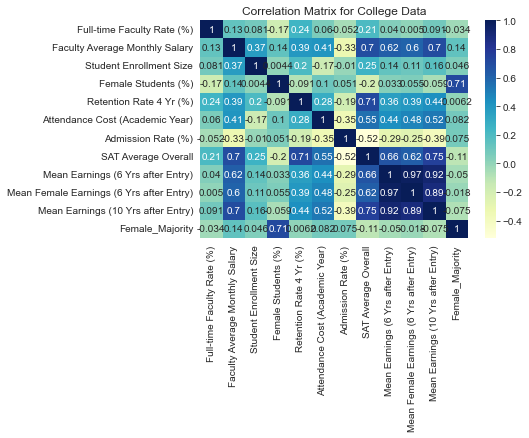

In [136]:
cm = sns.heatmap(df.corr(),annot=True, cmap = "YlGnBu")
cm.set(title = 'Correlation Matrix for College Data')

In [137]:
import plotly.express as px

In [138]:
# plots to make:
# faculty salary by mean earnings 6,10 years
# hue = school ownership
fe = px.scatter(data_frame = df, color="School Ownership",
                x = "Faculty Average Monthly Salary", y = "Mean Earnings (6 Yrs after Entry)",
                hover_name=df['School Name'], trendline='ols',template = 'ggplot2')
fe.update_layout(hovermode='closest')



In [173]:
fig = px.scatter(data_frame = df, color="School Ownership",
                 x = "SAT Average Overall", y = "Retention Rate 4 Yr (%)",
                 hover_name=df['School Name'],trendline='ols',
#                  color_discrete_map={ # replaces default color mapping by value
#                 "True": "RebeccaPurple", "False": "MediumGreen"},
                 template = 'ggplot2')
fig.show()

In [139]:
fig = px.scatter(data_frame = df, color="Female_Majority",
                 x = "Faculty Average Monthly Salary", y = "Mean Earnings (6 Yrs after Entry)",
                 hover_name=df['School Name'],trendline='ols',
                 color_discrete_map={ # replaces default color mapping by value
                "True": "RebeccaPurple", "False": "MediumGreen"},
                 template = 'plotly_white')
fig.show()
           

# SAT overage with retention rate
# hue = school ownership

# SAT average with with mean earnings 10 years (could compare to 6)

## for all, words shown = school name, enrollment size, average academic year cost

<AxesSubplot:xlabel='School Ownership', ylabel='Mean Earnings (6 Yrs after Entry)'>

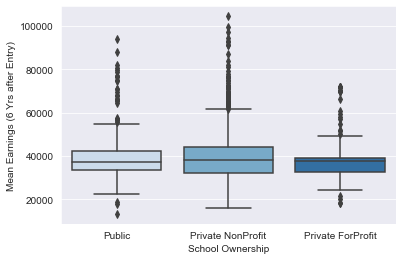

In [140]:
sns.set_style("darkgrid")
sns.boxplot(data=df, x="School Ownership", y = "Mean Earnings (6 Yrs after Entry)",
           palette = "Blues")

<AxesSubplot:xlabel='School Ownership', ylabel='Mean Earnings (10 Yrs after Entry)'>

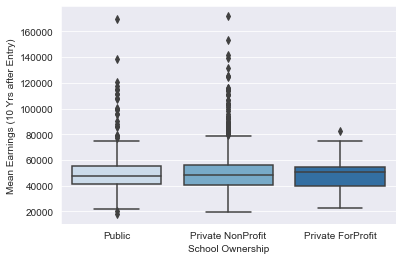

In [141]:
sns.boxplot(data=df, x="School Ownership", y = "Mean Earnings (10 Yrs after Entry)",
           palette = "Blues")

In [169]:
top10states = list(df.groupby('State')["Mean Earnings (10 Yrs after Entry)"].mean().sort_values(ascending=False).index[0:10])
top10states

['DC', 'MA', 'RI', 'CT', 'CA', 'MD', 'NJ', 'NY', 'NH', 'IL']

<AxesSubplot:xlabel='State', ylabel='Mean Earnings (10 Yrs after Entry)'>

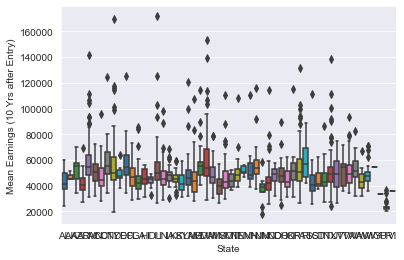

In [170]:
sns.boxplot(data=df, x="State", y = "Mean Earnings (10 Yrs after Entry)",
           palette = "tab10")